In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import RobustScaler

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import joblib

In [2]:
# Load main dataset
dataset = pd.read_csv("main_datasets/dataset.csv", index_col=0)
target = pd.read_csv("main_datasets/target.csv", index_col=0)

In [3]:
import matplotlib.pyplot as plt
from plot_settings import * # plot configuration 

ide_plot() #plot for github dark theme

In [4]:
from model.classification_model import ClassifierModel # class with classifiers
from model.reduce_model import ReduceModel # class with autoencoder

In [5]:
red_model = joblib.load("../phase_transmition_ML/best/reduce_model.pkl")
clf_model = joblib.load("../phase_transmition_ML/best/c_model.pkl")

In [6]:
qmof = red_model.dataset.cpu().detach().numpy()

In [7]:
qmof.shape

(7463, 1018)

In [8]:
qmof_reduced = red_model.transform(qmof)

In [9]:
main_reduced = red_model.transform(dataset)

In [10]:
from sklearn.model_selection import train_test_split


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    main_reduced, target.values.ravel(), test_size=0.2, random_state=42,
    stratify=target.values.ravel()
    )

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
qmof_reduced_scaled = scaler.transform(qmof_reduced)

In [12]:
cat_ = np.array([*qmof_reduced, *main_reduced])

In [39]:
IF = IsolationForest().fit(main_reduced)

y1 = IF.predict(cat_)
 
name = "IsolationForest"

tsne = TSNE(n_components=2, random_state=0)
X_t = tsne.fit_transform(scaler.transform(cat_))
pca = PCA(n_components=2, random_state=0)
X_p = pca.fit_transform(scaler.transform(cat_))

In [40]:
print(f"anomaly count in main dataset: {len(np.where(IF.predict(main_reduced) == -1)[0])}")

anomaly count in main dataset: 20


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


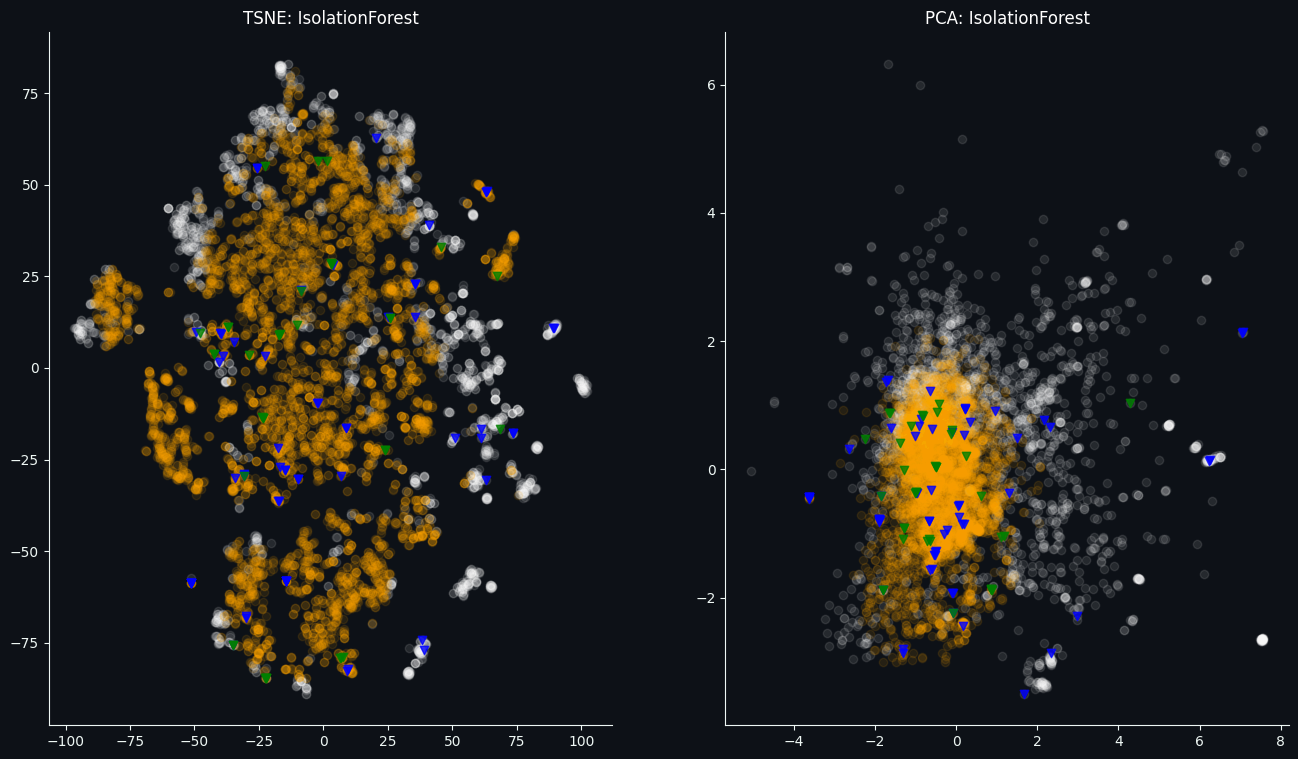

In [41]:
colors = ["r", 'orange', 'yellow', 'g', 'blue', 'purple', 'black', 'white']

figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))

for i in [-1, 1]:
    ax1.scatter(X_t[np.where(y1 == i), 0], X_t[np.where(y1 == i), 1], marker='o',alpha = 0.1, color=colors[i])
    
    ax2.scatter(X_p[np.where(y1 == i), 0], X_p[np.where(y1 == i), 1], marker='o',alpha = 0.1, color=colors[i])
    
    
ax1.scatter(X_t[qmof_reduced.shape[0]:, 0][np.where(target == 0)[0]], X_t[qmof_reduced.shape[0]:, 1][np.where(target == 0)[0]], marker='v',alpha = 0.8, color="b")
ax1.scatter(X_t[qmof_reduced.shape[0]:, 0][np.where(target == 1)[0]], X_t[qmof_reduced.shape[0]:, 1][np.where(target == 1)[0]], marker='v',alpha = 0.8, color="g")

ax2.scatter(X_p[qmof_reduced.shape[0]:, 0][np.where(target == 0)[0]], X_p[qmof_reduced.shape[0]:, 1][np.where(target == 0)[0]], marker='v',alpha = 0.8, color="b")
ax2.scatter(X_p[qmof_reduced.shape[0]:, 0][np.where(target == 1)[0]], X_p[qmof_reduced.shape[0]:, 1][np.where(target == 1)[0]], marker='v',alpha = 0.8, color="g")


ax1.set_title(f"TSNE: IsolationForest")
ax2.set_title(f"PCA: IsolationForest")
ax2.legend()

In [48]:
n_clusters = 3

km = KMeans(n_clusters=n_clusters, n_init="auto", init="k-means++", algorithm="elkan").fit(cat_)
y1 = km.predict(cat_)
 
name = "K means"

tsne = TSNE(n_components=2, random_state=0)
X_t = tsne.fit_transform(scaler.transform(cat_))
pca = PCA(n_components=2, random_state=0)
X_p = pca.fit_transform(scaler.transform(cat_))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


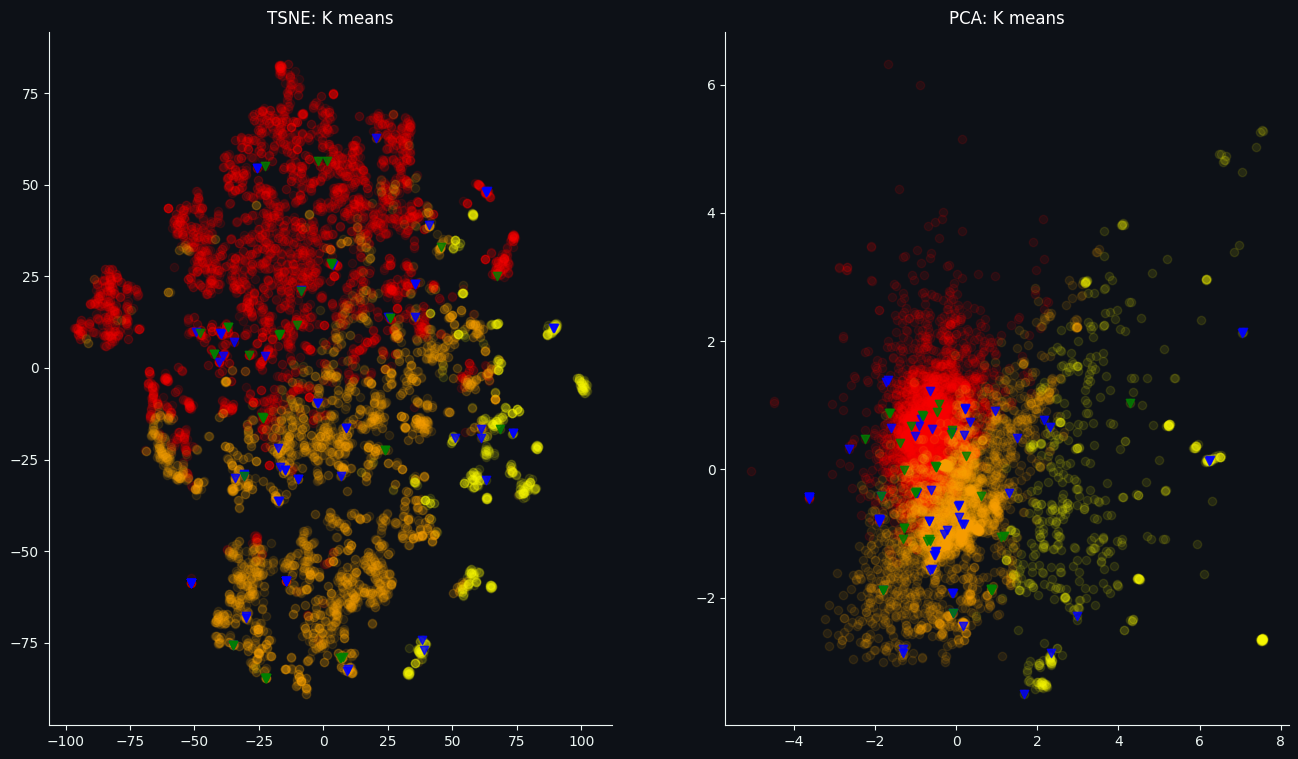

In [49]:
colors = ["r", 'orange', 'yellow', 'g', 'blue', 'purple', 'black', 'white']

figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))

for i in range(n_clusters):
    ax1.scatter(X_t[np.where(y1 == i), 0], X_t[np.where(y1 == i), 1], marker='o',alpha = 0.1, color=colors[i])
    
    ax2.scatter(X_p[np.where(y1 == i), 0], X_p[np.where(y1 == i), 1], marker='o',alpha = 0.1, color=colors[i])
    
    
ax1.scatter(X_t[qmof_reduced.shape[0]:, 0][np.where(target == 0)[0]], X_t[qmof_reduced.shape[0]:, 1][np.where(target == 0)[0]], marker='v',alpha = 0.8, color="b")
ax1.scatter(X_t[qmof_reduced.shape[0]:, 0][np.where(target == 1)[0]], X_t[qmof_reduced.shape[0]:, 1][np.where(target == 1)[0]], marker='v',alpha = 0.8, color="g")

ax2.scatter(X_p[qmof_reduced.shape[0]:, 0][np.where(target == 0)[0]], X_p[qmof_reduced.shape[0]:, 1][np.where(target == 0)[0]], marker='v',alpha = 0.8, color="b")
ax2.scatter(X_p[qmof_reduced.shape[0]:, 0][np.where(target == 1)[0]], X_p[qmof_reduced.shape[0]:, 1][np.where(target == 1)[0]], marker='v',alpha = 0.8, color="g")


ax1.set_title(f"TSNE: {name}")
ax2.set_title(f"PCA: {name}")
ax2.legend()

In [52]:
for i in range(n_clusters):
    print(len(np.where(y1[qmof_reduced.shape[0]:] == i)[0])/len(np.where(y1 == i)[0]))

3847 53
3065 40
653 9


In [53]:
for i in range(n_clusters):
    print(len(np.where(y1[qmof_reduced.shape[0]:] == i)[0])/len(np.where(y1 == i)[0]))

0.013776969066805303
0.013050570962479609
0.013782542113323124
